In [2]:
#Bu kod GTU-Elektronik Mühendisliği, 2022-GÜZ ELM-427 kodlu ders için bonus ödev olarak hazırlanmıştır.
#MNIST  Data seti özelinde ANN konusu işlenmiştir. Yalnızca numpy ve matplotlib kütüphanesi kullanılmıştır.
# Yazar Hakan TAŞKIRAN -  06.12.2022


import numpy as np #İsterlere uygun şekilde numpy kütüphanesinin eklenmesi
import pandas as pd #Pandas Yalnızca datasetini okumak için kullanılmıştır.
from matplotlib import pyplot as plt#İsterlere uygun şekilde matplotlib  kütüphanesinin eklenmesi
#data = pd.read_csv('son.csv')#Pandas Yalnızca datasetini okumak için kullanılmıştır.
data  = pd.read_excel('son.xlsx')
%matplotlib inline


In [3]:
data.head()#Data setinden bir kesit

,Name,Value.gain,Value.bw,Value.constraint_gain_constraint,Value.constraint_pm_constraint,Value.LM1,Value.LM2,Value.LM3,Value.WM1,Value.WM2,Value.WM3,Value.Rb,Value.Vb
0,0,-0.596451,-0.128371,-32.80479,-14.269970,4.104747e-07,1.235140e-06,9.892127e-07,0.000097,0.000096,0.000010,105.066228,0.641304
1,1,-0.473214,-0.283493,-26.02679,-28.618986,2.719115e-07,1.859074e-07,3.775053e-07,0.000097,0.000096,0.000011,105.066228,0.622662
2,2,-0.660094,-0.077954,-36.30517,-21.181227,5.148104e-07,1.939241e-07,1.282698e-06,0.000097,0.000096,0.000006,2157.481731,0.671534
3,3,-0.660516,-0.077646,-36.32836,-21.220565,5.148104e-07,1.859074e-07,1.282698e-06,0.000097,0.000096,0.000006,2157.481731,0.671534
4,4,-0.599288,-0.125778,-32.96086,-13.336307,4.104747e-07,1.235140e-06,1.052674e-06,0.000097,0.000096,0.000010,105.066228,0.641304


In [4]:
#data.head()#Data setinden bir kesit
data = data.drop(['Name','Value.constraint_gain_constraint','Value.constraint_pm_constraint' ], axis=1)
y = data['Value.gain']
y1 = data['Value.bw']


In [5]:
data.head()#Data setinden bir kesit

,Value.gain,Value.bw,Value.LM1,Value.LM2,Value.LM3,Value.WM1,Value.WM2,Value.WM3,Value.Rb,Value.Vb
0,-0.596451,-0.128371,4.104747e-07,1.235140e-06,9.892127e-07,0.000097,0.000096,0.000010,105.066228,0.641304
1,-0.473214,-0.283493,2.719115e-07,1.859074e-07,3.775053e-07,0.000097,0.000096,0.000011,105.066228,0.622662
2,-0.660094,-0.077954,5.148104e-07,1.939241e-07,1.282698e-06,0.000097,0.000096,0.000006,2157.481731,0.671534
3,-0.660516,-0.077646,5.148104e-07,1.859074e-07,1.282698e-06,0.000097,0.000096,0.000006,2157.481731,0.671534
4,-0.599288,-0.125778,4.104747e-07,1.235140e-06,1.052674e-06,0.000097,0.000096,0.000010,105.066228,0.641304


In [6]:
data = np.array(data)# 

In [10]:
#aDta setinin array (dizi) tipine dönüştürülmesi
data = np.array(data)# 

In [17]:
rows, cols = data.shape# data boyutlarının aktarımı
np.random.shuffle(data) #Sıralı şekilde datanın işlenmemesi için random şekilde datanın çağrılması, random paket geline getirilmesi

#test datalarına yönelik işlem
test_data = data[:500].T# test datalarını seçme /ayırma işlemi
y_test = test_data[1:2] # test datasını etiketleme işlemi
x_test = test_data[2:] # test datası piksellerin atanması
 

#tain datalarına yönelik işlem
train_data = data[1600:].T# train datalarını seçme /ayırma işlemi
y_train = train_data[1:2] # train datasını etiketleme işlemi
x_train = train_data[2:] # train datası piksellerin atanması


[3.24387400e-07 5.14810415e-07 2.09770415e-07 4.10788029e-07
 5.14810415e-07 4.57866624e-07 2.09770415e-07 4.57866624e-07
 4.10474652e-07 5.94485318e-07 3.24387400e-07 4.10474652e-07
 1.06916126e-06 4.10788029e-07 3.96516796e-07 9.06624690e-07
 4.10474652e-07 4.57866624e-07 3.62042039e-07 8.43470328e-07
 5.14810415e-07 5.14810415e-07 5.14810415e-07 4.10788029e-07
 3.47784003e-07 1.14882872e-06 3.02170133e-07 4.57866624e-07
 9.86260249e-07 4.57866624e-07 3.24387400e-07 4.10788029e-07
 3.62042039e-07 3.24387400e-07 4.10788029e-07 3.02170133e-07
 4.10474652e-07 4.10788029e-07 4.57866624e-07 5.94485318e-07
 8.43470328e-07 4.10474652e-07 5.14810415e-07 4.10788029e-07
 3.62042039e-07 5.94485318e-07 2.71911502e-07 2.71911502e-07
 4.10474652e-07 4.10788029e-07 5.06644194e-07 2.71911502e-07
 2.71911502e-07 4.10474652e-07 2.71911502e-07 3.62042039e-07
 5.14810415e-07 2.09770415e-07 8.66782662e-07 8.66782662e-07
 4.57866624e-07 4.57866624e-07 4.10788029e-07 4.57866624e-07
 4.10788029e-07 8.667826

In [64]:
print(len(y_test))
#label_range = set(list(y_test) + list(y_train))# Data setinde unique olarak bulunan değerlerin saptanması
#print(label_range)

1


In [130]:
x_train.shape#eğitim data setinin boyutları

(784, 8400)

In [126]:
# ANN Yapısındaki tüm fonksiyonların numpy kütüphanesi yardımıyla class yapısında yazılması

class numpy_nn:
    def __init__(self, X=None, Y = None, lr = None):
        #1. LAYER
        #10 node dan oluşacak şekilde 784 pikselin input formatında işlenmesi
        #(W.XT)
        self.W1 = np.random.rand(10, 784) - 0.5
        self.B1 = np.random.rand(10, 1) - 0.5
        
        #2nd layer has 10 nodes, 1st layer output nodes are 10
        #2.LAYER birinciden gelen layer çıktıları 10 ve 10 nodlu yapı
        self.W2 = np.random.rand(10, 10) - 0.5
        self.B2 = np.random.rand(10, 1) - 0.5
        
        self.Z1 = None # a1wt+b1
        self.A1 = None # aktivasyon fonksiyonu(z1)
        self.Z2 = None # a2wt+b2
        self.A2 = None # aktivasyon fonksiyonu(z2)
        
        self.lr = lr# learning rate
        
        self.labels = Y #hedef değer de denilebilir, labels
        self.X = X #input parametleri 
        
    def forward_prop(self):
        #Neural Network’te input’tan başlayarak output’a giden yolculuğumuz ileri yön (forward) olarak isimlendirilmektedir. 
        #Her node’a giren weights, eldeki değer ile (input ise x feature değeri ile, hidden layer ise o node’a giren önceki çarpımların toplamından gelen değer ile) çarpılır ve bias eklenir. 
        #Bu çarpma işlemine “dot product” denir ve bunun nedeni de vektörlerle işlem yapmamızdır.
        
        #1. hidden layer
        self.Z1 = self.W1.dot(self.X) + self.B1
        self.A1 = self.relu(self.Z1)
        
        #2. hidden layer
        self.Z2 = self.W2.dot(self.A1) + self.B2
        self.A2 = self.softmax(self.Z2)
    
    def relu(self, Z): #aktivasyon fonksiyonu ÖDEV 6 raporunda detaylı anlatımı mevcuttur.
        return np.maximum(Z, 0)
    
    def softmax(self, z): #softmax fonksiyonu
        a = np.exp(z) / sum(np.exp(z))
        return a
    
    def backward_prop(self):
        #Bu algoritma hataları output’tan input’a doğru azaltmaya çalışmasından dolayı geri yayılım ismini almıştır. 
        #Gradyan iniş olarak adlandırılan bir teknik kullanarak ağırlık alanındaki hata fonksiyonunun minimum değerini arar
        m = self.labels.size
        one_hot_y = self.one_hot_encod()
        dz2 = self.A2 - one_hot_y
        dw2 = (1 / m) * dz2.dot(self.A1.T)
        db2 = (1 / m) * np.sum(dz2)
        
        dz1 = self.W2.T.dot(dz2) * self.derivative_relu(self.Z1)
        dw1 = (1 / m) * dz1.dot(self.X.T)
        db1 = (1 / m) * np.sum(dz1)        
       
        # backpropagation sonra , parametrelerin güncellenmesi
        self.__update_parameters(dw1, db1, dw2, db2)
    
    def one_hot_encod(self):
        #her satırı etiketli şekilde numaralandırma
        one_hot_shape = (self.labels.size, len(label_range))
        one_hot_y = np.zeros(one_hot_shape)
        one_hot_y[np.arange(self.labels.size), self.labels] = 1
        return one_hot_y.T
    
    def derivative_relu(self, Z):
        return Z > 0
    
    def __update_parameters(self, dw1, db1, dw2, db2):
        #layer parametlerinin güncellenmesi
        self.W1 = self.W1 - self.lr * dw1
        self.B1 = self.B1 - self.lr * db1
        
        self.W2 = self.W2 - self.lr * dw2
        self.B2 = self.B2 - self.lr * db2
    
    def get_accuracy(self): #doğruluğun hesaplanması tahmin == target olarak düşünülebilir.
        hkn1=[]
        predictions = self.hkn()
        hkn1.append(np.sum(predictions == self.labels) / self.labels.size)
        return np.sum(predictions == self.labels) / self.labels.size
    
 
    
    def hkn(self,):
        return np.argmax(self.A2, 0)
        

(2, 1691)
(2, 500)
(8, 1691)
(8, 500)
(8, 500)
(500,)
(8, 1691)
(1691,)


In [127]:
#Gradyan azaltma yönteminin uygulanması ve her 10 iterasyonda sonuç alınması işlemi
accuracy=[]
iterations = 2000
iterations_plot = np.arange(iterations)
lr = 0.1
def gradient_descent(X, Y, iterations):
    for i in range(iterations):
        neural_net_init.forward_prop()
        neural_net_init.backward_prop()
        if i%1==0:
            print('Iterations: {}'.format(i))
            print("Accuracy: {}".format(neural_net_init.get_accuracy()))
            accuracy.append(neural_net_init.get_accuracy())
    plt.plot((iterations_plot),accuracy)


#eğitim işleminin gerçekleştirilmesi
neural_net_init = numpy_nn(x_train, y_train, lr)
gradient_descent(x_train, y_train, iterations)

plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(['Learning Rate:0.1 '])

C:\Users\HAKAN\AppData\Local\Temp\ipykernel_1468\3284997312.py:79: RuntimeWarning: overflow encountered in exp
  a = np.exp(z) / sum(np.exp(z))
C:\Users\HAKAN\AppData\Local\Temp\ipykernel_1468\3284997312.py:79: RuntimeWarning: invalid value encountered in true_divide
  a = np.exp(z) / sum(np.exp(z))


NameError: name 'label_range' is not defined

Predicted label: [3]
Actual label: [3]


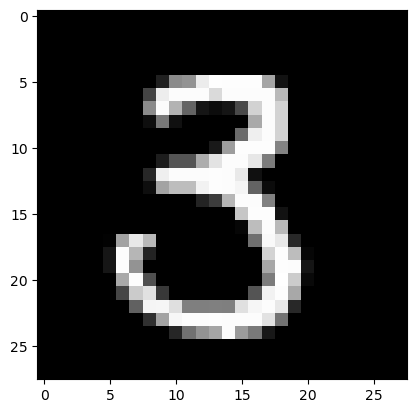

In [142]:
# for testing on trained dataset first
def trial():
    _, m = x_test.shape
    index = np.random.randint(m +1, size=1)
    current_image = x_test[:, int(index), None]
    label = y_test[index]
    #bir tahminde bulunmak için ağırlık  ve biasları kullanılması
    neural_net_init.X = current_image
    neural_net_init.labels = label

    #ileri yönlü besleme
    neural_net_init.forward_prop()
    prediction = neural_net_init.hkn()
    print("Predicted label: {}".format(prediction))
    print("Actual label: {}".format(label))

    #MNIST görüntüsünün bastırılması
    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

trial()